In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
from wordcloud import WordCloud

In [33]:
df = pd.read_excel("UNESCOs_Technology_Enabled_Open_School_Project_TeOSS_Learners_Training_Program_Post-Training_Assessment_.xlsx")
df.head()

,start,end,1. Name,2. Age,3. Gender,4. Name of School,5. Grade/Class,6. Region of School,7. How would you rate the overall training experience?,8. What aspects of the training did you enjoy most?,...,_id,_uuid,_submission_time,_validation_status,_notes,_status,_submitted_by,__version__,_tags,_index
0,2024-09-17 10:10:42.110,2024-09-17 10:18:55.756,SAMLA MELODY,11,Female,AKATSI NO.1 BASIC SCHOOL,Primary 2,Volta,Good,All aspects,...,384507902,0b06f199-2b8c-4a9e-ac5b-6f2e84c2d173,2024-09-17 10:18:57,NaN,NaN,submitted_via_web,NaN,vRnq38mdhav6ufiNCRBvdB,NaN,1
1,2024-09-17 08:54:55.748,2024-09-17 10:30:09.788,MENSAH DENNIS,9,Male,AKATSI NO. 1 BASIC,Primary 2,Volta,Good,TYPING,...,384513668,ba6b129d-4e76-4318-82c8-a800bba3bc00,2024-09-17 10:30:03,NaN,NaN,submitted_via_web,NaN,vRnq38mdhav6ufiNCRBvdB,NaN,2
2,2024-09-17 10:30:10.002,2024-09-17 10:37:43.941,AMEEVOR EMMANUELLA,9,Female,AKATSI NO. 1 BASIC,Primary 2,Volta,Good,EVERYTHING,...,384517331,4fdf981d-5293-4e94-a6e0-6c5703a13070,2024-09-17 10:37:37,NaN,NaN,submitted_via_web,NaN,vRnq38mdhav6ufiNCRBvdB,NaN,3
3,2024-09-17 10:37:44.060,2024-09-17 10:48:22.056,DOGBEY BLESS,8,Female,NaN,Primary 2,Volta,Very good,WHEN WE SANG,...,384522893,b2df8d95-1dd2-43fe-a159-43fdc3aa4a86,2024-09-17 10:48:15,NaN,NaN,submitted_via_web,NaN,vRnq38mdhav6ufiNCRBvdB,NaN,4
4,2024-09-17 10:48:22.264,2024-09-17 11:21:45.844,SACKEY BETTY,11,Female,AKATSI NO. 1 BASIC,Primary 2,Volta,Very good,EVERYTHING,...,384539518,67f8f906-be24-419d-942b-23ca02bb2b91,2024-09-17 11:21:39,NaN,NaN,submitted_via_web,NaN,vRnq38mdhav6ufiNCRBvdB,NaN,5


In [34]:
df.columns

Index(['start', 'end', '1. Name ', '2. Age', '3. Gender', '4. Name of School',
       '5. Grade/Class', '6. Region of School',
       '7. How would you rate the overall training experience?',
       '8. What aspects of the training did you enjoy most?',
       '9. Were the training objectives clearly communicated?',
       '10. How engaging did you find the training sessions?',
       '11. How effective were the trainers in delivering the content?',
       '12. How would you rate the training materials provided?',
       '13. What new skills or knowledge did you acquire from the training?',
       '14. How confident do you feel in using technology for learning after the training?',
       '15. What challenges did you encounter while using technology during the training?',
       '16. How do you plan to apply what you learned in your studies?',
       '17. What topics would you like to see covered in future training sessions?',
       '18. Do you have any suggestions to improve the trai

In [35]:
df_drop = df.drop(['4. Grade/Class',
       '5. Region of School',
       '6. How would you rate the overall training experience?',
       '7. What aspects of the training did you enjoy most?',
       '8. Were the training objectives clearly communicated?',
       '9. How engaging did you find the training sessions?',
       '10. How effective were the trainers in delivering the content?',
       '11. How would you rate the training materials provided?',
       '12. What new skills or knowledge did you acquire from the training?',
       '13. How confident do you feel in using technology for learning after the training?',
       '14. What challenges did you encounter while using technology during the training?',
       '15. How do you plan to apply what you learned in your studies?',
       '16. What topics would you like to see covered in future training sessions?',
       '17. Do you have any suggestions to improve the training program?',
       '18. Any additional comments or feedback?', '_id', '_uuid',
       '_submission_time', '_validation_status', '_notes', '_status',
       '_submitted_by', '__version__', '_tags', '_index'], axis=1, inplace=True)

In [36]:
df.head()

,start,end,1. Name,2. Age,3. Gender,4. Name of School,5. Grade/Class,6. Region of School,7. How would you rate the overall training experience?,8. What aspects of the training did you enjoy most?,...,10. How engaging did you find the training sessions?,11. How effective were the trainers in delivering the content?,12. How would you rate the training materials provided?,13. What new skills or knowledge did you acquire from the training?,14. How confident do you feel in using technology for learning after the training?,15. What challenges did you encounter while using technology during the training?,16. How do you plan to apply what you learned in your studies?,17. What topics would you like to see covered in future training sessions?,18. Do you have any suggestions to improve the training program?,19. Any additional comments or feedback?
0,2024-09-17 10:10:42.110,2024-09-17 10:18:55.756,SAMLA MELODY,11,Female,AKATSI NO.1 BASIC SCHOOL,Primary 2,Volta,Good,All aspects,...,Very engaging,Effective,Very good,How use the Tablet,Somewhat confident,How to type in the browser,Apply in my everyday life,Cyber security,Everyone to get Tablet,Everyone should involve
1,2024-09-17 08:54:55.748,2024-09-17 10:30:09.788,MENSAH DENNIS,9,Male,AKATSI NO. 1 BASIC,Primary 2,Volta,Good,TYPING,...,Very engaging,Very effective,Very good,I CAN NOW TEACH MY PARENTS TO USE THE INTERNET,Confident,NO CHALLENGES,I WILL CONTINUE TO APPLY IT IN MY STUDIES AT HOME,TO EXPLORE THE INTERNET WITH SEARCH ENGINES FO...,THE TRAINING SHOULD BE REPEATED,I LOVE THE TRAINING
2,2024-09-17 10:30:10.002,2024-09-17 10:37:43.941,AMEEVOR EMMANUELLA,9,Female,AKATSI NO. 1 BASIC,Primary 2,Volta,Good,EVERYTHING,...,Very engaging,Effective,Good,HOW TO WRITE & LEARN,Confident,NO CHALLENGES,TO EXPLORE MORE,THE USE OF THE INTERNET,NO SUGGESTIONS,NO COMMENTS
3,2024-09-17 10:37:44.060,2024-09-17 10:48:22.056,DOGBEY BLESS,8,Female,NaN,Primary 2,Volta,Very good,WHEN WE SANG,...,Very engaging,Effective,Very good,PLAYING GAMES,Confident,NO CHALLENGES,TO EXPLORE THE INTERNET,WHERE WE WERE ASKED TO TYPE WORDS,NO SUGGESTIONS,NO ADDITIONAL COMMENTS
4,2024-09-17 10:48:22.264,2024-09-17 11:21:45.844,SACKEY BETTY,11,Female,AKATSI NO. 1 BASIC,Primary 2,Volta,Very good,EVERYTHING,...,Very engaging,Very effective,Very good,KIDD. COM,Confident,NO CHALLENGES,TO TEACH OTHERS,ANY NEW DISCORVERIES,NO SUGGESTIONS,NO COMMENTS


In [37]:
df.rename(columns = {"start":"start_time", "end":"end_time", "1. Name ":"name", "2. Age":"age", "3. Gender":"gender", "4. Name of School":"name_of_school",
                    "5. Grade/Class":"grade_or_class", "6. Region of School":"region_of_school", "7. How would you rate the overall training experience?":"how_would_you_rate_the_overall_training_experience?",
                    "8. What aspects of the training did you enjoy most?":"what_aspects_of_the_training_did_you_enjoy_most?", "9. Were the training objectives clearly communicated?":"were_the_training_objectives_clearly_communicated?", 
                    "10. How engaging did you find the training sessions?":"how_engaging_did_you_find_the_training_sessions?", "11. How effective were the trainers in delivering the content?":"how_effective_were_the_trainers_in_delivering_the_content?", 
                    "12. How would you rate the training materials provided?":"how_would_you_rate_the_training_materials_provided?", "13. What new skills or knowledge did you acquire from the training?":"what_new_skills_or_knowledge_did_you_acquire_from_the_training?", 
                    "14. How confident do you feel in using technology for learning after the training?":"how_confident_do_you_feel_in_using_technology_for_learning_after_the_training?", "15. What challenges did you encounter while using technology during the training?":"what_challenges_did_you_encounter_while_using_technology_during_the_training?",  
                    "16. How do you plan to apply what you learned in your studies?":"how_do_you_plan_to_apply_what_you_learned_in_your_studies?", "17. What topics would you like to see covered in future training sessions?":"what_topics_would_you_like_to_see_covered_in_future_training_sessions?",
                    "18. Do you have any suggestions to improve the training program?":"do_you_have_any_suggestions_to_improve_the_training_program?", "19. Any additional comments or feedback?":"any_additional_comments_or_feedback?" }, inplace=True)

In [38]:
df.columns

Index(['start_time', 'end_time', 'name', 'age', 'gender', 'name_of_school',
       'grade_or_class', 'region_of_school',
       'how_would_you_rate_the_overall_training_experience?',
       'what_aspects_of_the_training_did_you_enjoy_most?',
       'were_the_training_objectives_clearly_communicated?',
       'how_engaging_did_you_find_the_training_sessions?',
       'how_effective_were_the_trainers_in_delivering_the_content?',
       'how_would_you_rate_the_training_materials_provided?',
       'what_new_skills_or_knowledge_did_you_acquire_from_the_training?',
       'how_confident_do_you_feel_in_using_technology_for_learning_after_the_training?',
       'what_challenges_did_you_encounter_while_using_technology_during_the_training?',
       'how_do_you_plan_to_apply_what_you_learned_in_your_studies?',
       'what_topics_would_you_like_to_see_covered_in_future_training_sessions?',
       'do_you_have_any_suggestions_to_improve_the_training_program?',
       'any_additional_comments_or_

In [41]:
df["name"].value_counts()

name
David Papa tuyee Ogoe      4
Emmanuel Ansah             4
Christian Deladem Dally    3
Bezaleel Graham Bassaw     3
Ali William                3
                          ..
Zong Ella                  1
Sapanbil Godslove          1
Sigbazaazore Mary          1
Ziyaaba Doapok Selina      1
DOGBEY BLESS               1
Name: count, Length: 1910, dtype: int64

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1982 entries, 0 to 1981
Data columns (total 21 columns):
 #   Column                                                                          Non-Null Count  Dtype         
---  ------                                                                          --------------  -----         
 0   start_time                                                                      1982 non-null   datetime64[ns]
 1   end_time                                                                        1982 non-null   datetime64[ns]
 2   name                                                                            1958 non-null   object        
 3   age                                                                             1957 non-null   object        
 4   gender                                                                          1929 non-null   object        
 5   name_of_school                                                              

In [46]:
df["name"] = df["name"].fillna("Unspecified")
df["age"] = df["age"].fillna(value=0)

In [50]:
df.columns

Index(['start_time', 'end_time', 'name', 'age', 'gender', 'name_of_school',
       'grade_or_class', 'region_of_school',
       'how_would_you_rate_the_overall_training_experience?',
       'what_aspects_of_the_training_did_you_enjoy_most?',
       'were_the_training_objectives_clearly_communicated?',
       'how_engaging_did_you_find_the_training_sessions?',
       'how_effective_were_the_trainers_in_delivering_the_content?',
       'how_would_you_rate_the_training_materials_provided?',
       'what_new_skills_or_knowledge_did_you_acquire_from_the_training?',
       'how_confident_do_you_feel_in_using_technology_for_learning_after_the_training?',
       'what_challenges_did_you_encounter_while_using_technology_during_the_training?',
       'how_do_you_plan_to_apply_what_you_learned_in_your_studies?',
       'what_topics_would_you_like_to_see_covered_in_future_training_sessions?',
       'do_you_have_any_suggestions_to_improve_the_training_program?',
       'any_additional_comments_or_

In [51]:
df["gender"] = df["gender"].fillna("Unspecified")
df["name_of_school"] = df["name_of_school"].fillna("Unspecified")
df["grade_or_class"] = df["grade_or_class"].fillna("Unspecified")
df["region_of_school"] = df["region_of_school"].fillna("Unspecified")
df["how_would_you_rate_the_overall_training_experience?"] = df["how_would_you_rate_the_overall_training_experience?"].fillna("Unspecified")
df["what_aspects_of_the_training_did_you_enjoy_most?"] = df["what_aspects_of_the_training_did_you_enjoy_most?"].fillna("Unspecified")
df["were_the_training_objectives_clearly_communicated?"] = df["were_the_training_objectives_clearly_communicated?"].fillna("Unspecified")
df["how_engaging_did_you_find_the_training_sessions?"] = df["how_engaging_did_you_find_the_training_sessions?"].fillna("Unspecified")
df["how_effective_were_the_trainers_in_delivering_the_content?"] = df["how_effective_were_the_trainers_in_delivering_the_content?"].fillna("Unspecified")
df["how_would_you_rate_the_training_materials_provided?"] = df["how_would_you_rate_the_training_materials_provided?"].fillna("Unspecified")
df["what_new_skills_or_knowledge_did_you_acquire_from_the_training?"] = df["what_new_skills_or_knowledge_did_you_acquire_from_the_training?"].fillna("Unspecified")
df["how_confident_do_you_feel_in_using_technology_for_learning_after_the_training?"] = df["how_confident_do_you_feel_in_using_technology_for_learning_after_the_training?"].fillna("Unspecified")
df["what_challenges_did_you_encounter_while_using_technology_during_the_training?"] = df["what_challenges_did_you_encounter_while_using_technology_during_the_training?"].fillna("Unspecified")
df["how_do_you_plan_to_apply_what_you_learned_in_your_studies?"] = df["how_do_you_plan_to_apply_what_you_learned_in_your_studies?"].fillna("Unspecified")
df["what_topics_would_you_like_to_see_covered_in_future_training_sessions?"] = df["what_topics_would_you_like_to_see_covered_in_future_training_sessions?"].fillna("Unspecified")
df["do_you_have_any_suggestions_to_improve_the_training_program?"] = df["do_you_have_any_suggestions_to_improve_the_training_program?"].fillna("Unspecified")
df["any_additional_comments_or_feedback?"] = df["any_additional_comments_or_feedback?"].fillna("Unspecified")

In [52]:
df.isna().sum()

start_time                                                                        0
end_time                                                                          0
name                                                                              0
age                                                                               0
gender                                                                            0
name_of_school                                                                    0
grade_or_class                                                                    0
region_of_school                                                                  0
how_would_you_rate_the_overall_training_experience?                               0
what_aspects_of_the_training_did_you_enjoy_most?                                  0
were_the_training_objectives_clearly_communicated?                                0
how_engaging_did_you_find_the_training_sessions?                            

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1982 entries, 0 to 1981
Data columns (total 21 columns):
 #   Column                                                                          Non-Null Count  Dtype         
---  ------                                                                          --------------  -----         
 0   start_time                                                                      1982 non-null   datetime64[ns]
 1   end_time                                                                        1982 non-null   datetime64[ns]
 2   name                                                                            1982 non-null   object        
 3   age                                                                             1982 non-null   object        
 4   gender                                                                          1982 non-null   object        
 5   name_of_school                                                              

In [56]:
df = df[pd.to_numeric(df['age'], errors='coerce').notnull()]

In [58]:
df["age"] = df["age"].astype(int)

C:\Users\Marc Bright\AppData\Local\Temp\ipykernel_24864\3261694546.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["age"] = df["age"].astype(int)


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1968 entries, 0 to 1981
Data columns (total 21 columns):
 #   Column                                                                          Non-Null Count  Dtype         
---  ------                                                                          --------------  -----         
 0   start_time                                                                      1968 non-null   datetime64[ns]
 1   end_time                                                                        1968 non-null   datetime64[ns]
 2   name                                                                            1968 non-null   object        
 3   age                                                                             1968 non-null   int64         
 4   gender                                                                          1968 non-null   object        
 5   name_of_school                                                                  1

In [63]:
df.describe()

,start_time,end_time,age
count,1968,1968,1968.000000
mean,2024-09-21 10:18:07.509005312,2024-09-21 11:14:39.245094656,12.022358
min,2024-09-17 06:44:23.001000,2024-09-17 06:51:51.590000,0.000000
25%,2024-09-18 14:52:06.536999936,2024-09-18 15:06:04.264750080,10.000000
50%,2024-09-19 20:58:28.068499968,2024-09-20 09:23:59.614000128,12.000000
75%,2024-09-24 14:18:52.593999872,2024-09-24 14:30:16.675249920,14.000000
max,2024-10-03 19:13:54.022000,2024-10-03 19:15:16.860000,57.000000
std,NaN,NaN,3.506912


In [66]:
df["age"].mean()

np.float64(12.022357723577235)

In [70]:
training_experience = df["how_would_you_rate_the_overall_training_experience?"].value_counts()
training_experience

how_would_you_rate_the_overall_training_experience?
Excellent      1120
Very good       627
Good            172
Unspecified      43
Poor              6
Name: count, dtype: int64

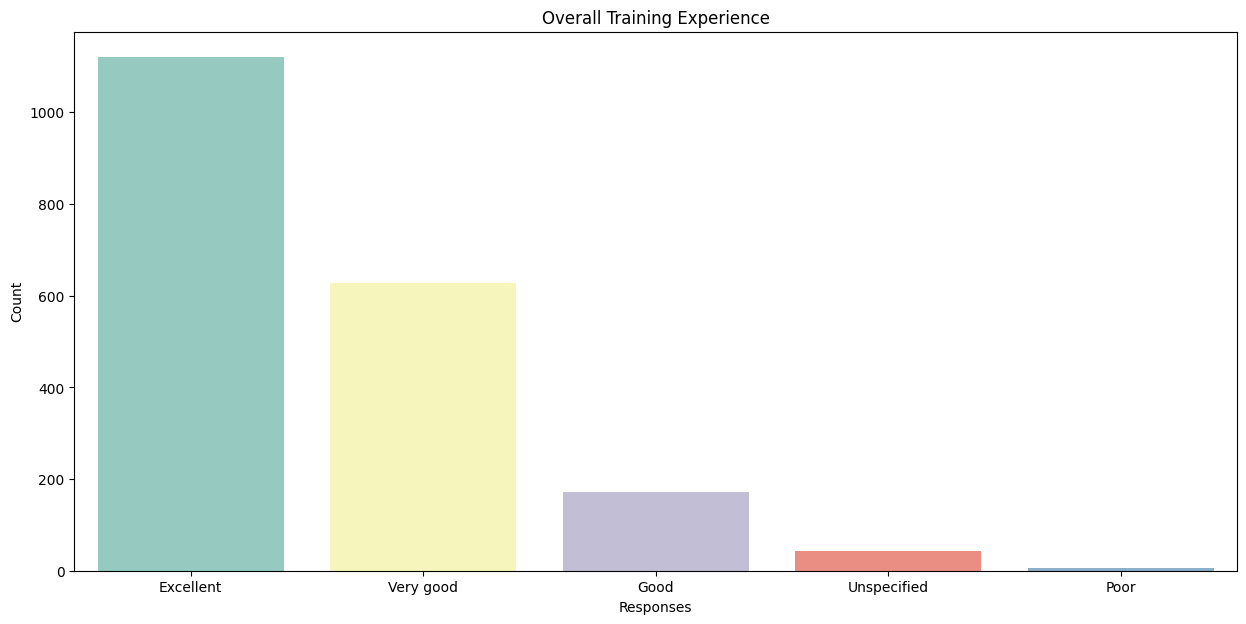

In [75]:
palette = sns.color_palette("Set3", n_colors=len(training_experience))
plt.figure(figsize=(15, 7))
sns.barplot(x=training_experience.index, y=training_experience.values,hue=training_experience.index, palette=palette, legend=False)
plt.title("Overall Training Experience")
plt.xlabel("Responses")
plt.ylabel("Count")

# Save the plot
plt.savefig("training_experience.png")

# Show the plot
plt.show()

In [79]:
training_you_enjoy_most = df["what_aspects_of_the_training_did_you_enjoy_most?"].value_counts()
training_you_enjoy_most

what_aspects_of_the_training_did_you_enjoy_most?
Unspecified                                  252
Cyber security                                92
All aspects                                   82
Cybersecurity                                 52
Internet                                      44
                                            ... 
Typing using search engine                     1
Uses of Internet                               1
How I access the internet for first time       1
Learning about the search engine for kids      1
I liked using the tablet                       1
Name: count, Length: 775, dtype: int64

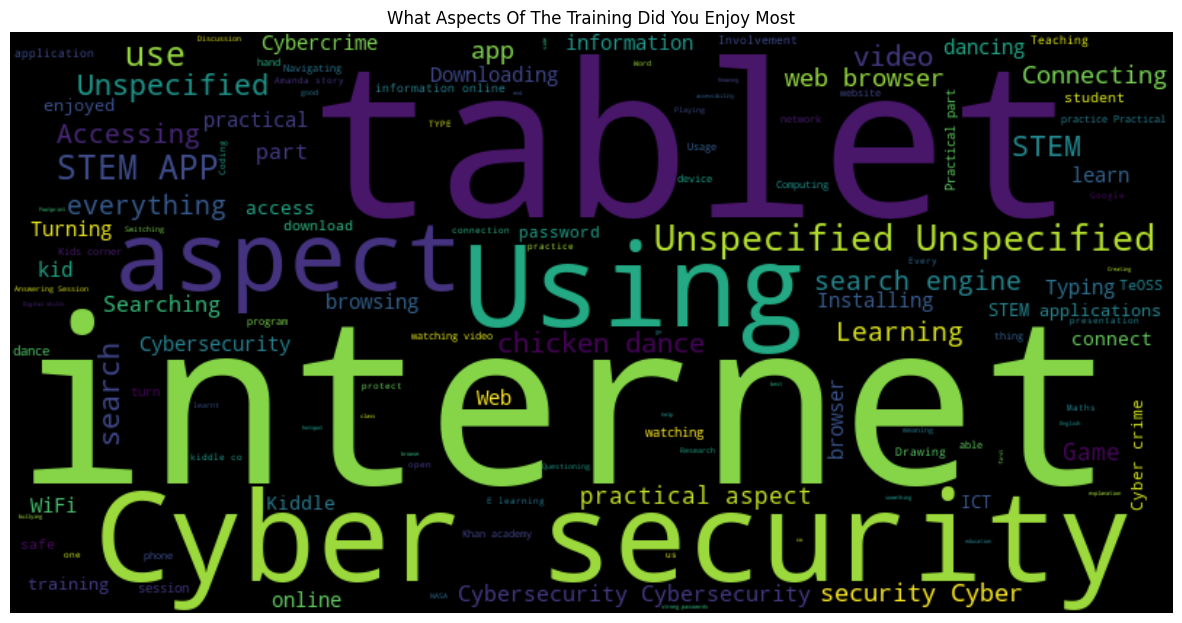

In [82]:
your_expectations = df["what_aspects_of_the_training_did_you_enjoy_most?"]

# Join all responses into a single string
text = " ".join(your_expectations.dropna())

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, random_state=40).generate(text)

# Plot the word cloud
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("What Aspects Of The Training Did You Enjoy Most")
plt.axis("off")
plt.savefig("training_you_enjoy_most.png")
plt.show()

In [93]:
training_objectives = df["were_the_training_objectives_clearly_communicated?"].value_counts()
training_objectives

were_the_training_objectives_clearly_communicated?
Yes            1884
Unspecified      60
NO               24
Name: count, dtype: int64

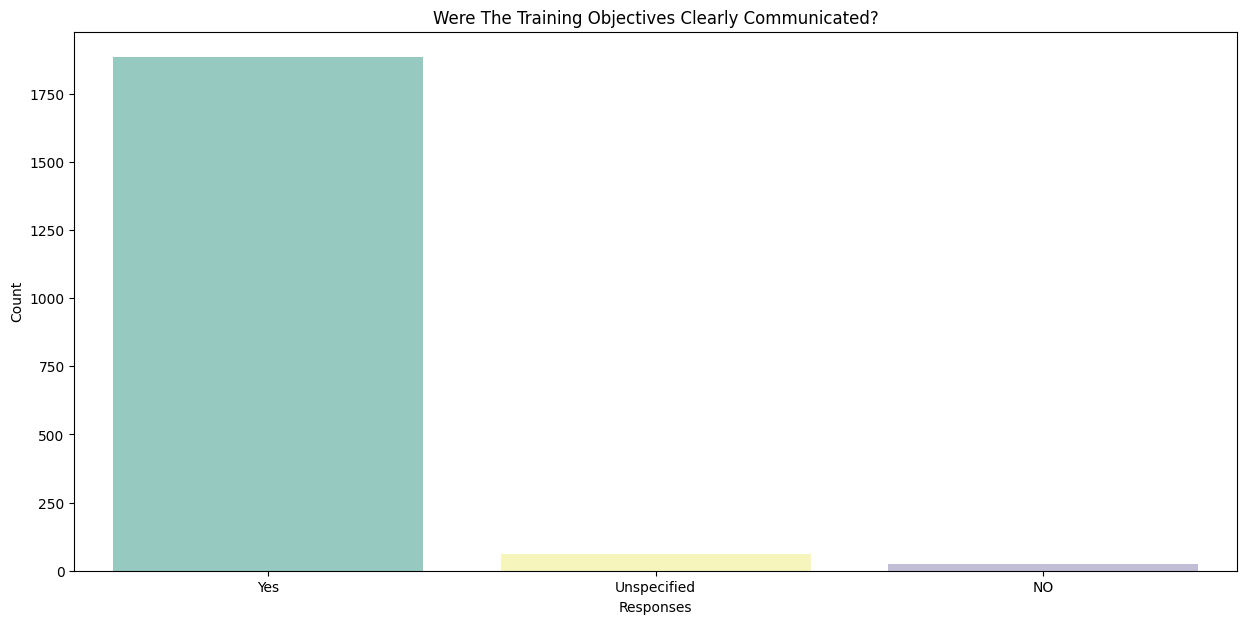

In [90]:
palette = sns.color_palette("Set3", n_colors=len(training_objectives))
plt.figure(figsize=(15, 7))
sns.barplot(x=training_objectives.index, y=training_objectives.values,hue=training_objectives.index, palette=palette, legend=False)
plt.title("Were The Training Objectives Clearly Communicated?")
plt.xlabel("Responses")
plt.ylabel("Count")

# Save the plot
plt.savefig("training_objectives.png")

# Show the plot
plt.show()

In [95]:
engaging_training_sessions = df["how_engaging_did_you_find_the_training_sessions?"].value_counts()
engaging_training_sessions

how_engaging_did_you_find_the_training_sessions?
Very engaging        1615
Somewhat engaging     282
Unspecified            59
Not engaging           12
Name: count, dtype: int64

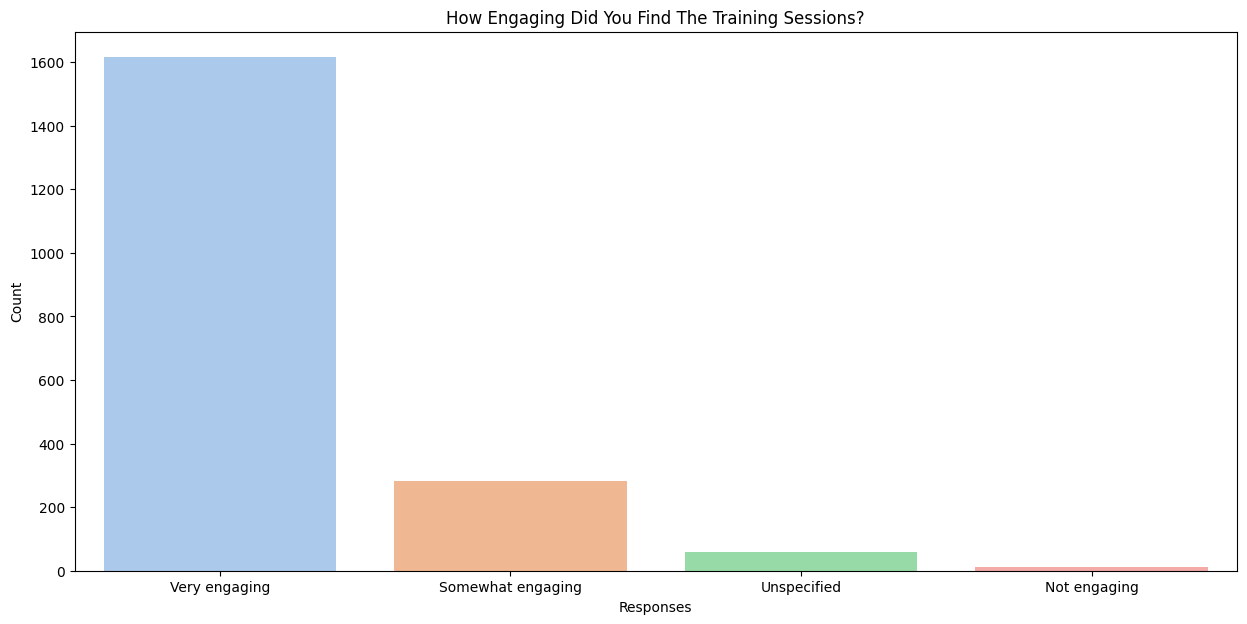

In [142]:
palette = sns.color_palette("pastel", n_colors=len(engaging_training_sessions))
plt.figure(figsize=(15, 7))
sns.barplot(x=engaging_training_sessions.index, y=engaging_training_sessions.values,hue=engaging_training_sessions.index, palette=palette, legend=False)
plt.title("How Engaging Did You Find The Training Sessions?")
plt.xlabel("Responses")
plt.ylabel("Count")

# Save the plot
plt.savefig("engaging_training_sessions.png")

# Show the plot
plt.show()

In [103]:
effective_delivering_the_content = df["how_effective_were_the_trainers_in_delivering_the_content?"].value_counts()
effective_delivering_the_content

how_effective_were_the_trainers_in_delivering_the_content?
Very effective        1121
Effective              647
Somewhat effective      84
Not effective           63
Unspecified             53
Name: count, dtype: int64

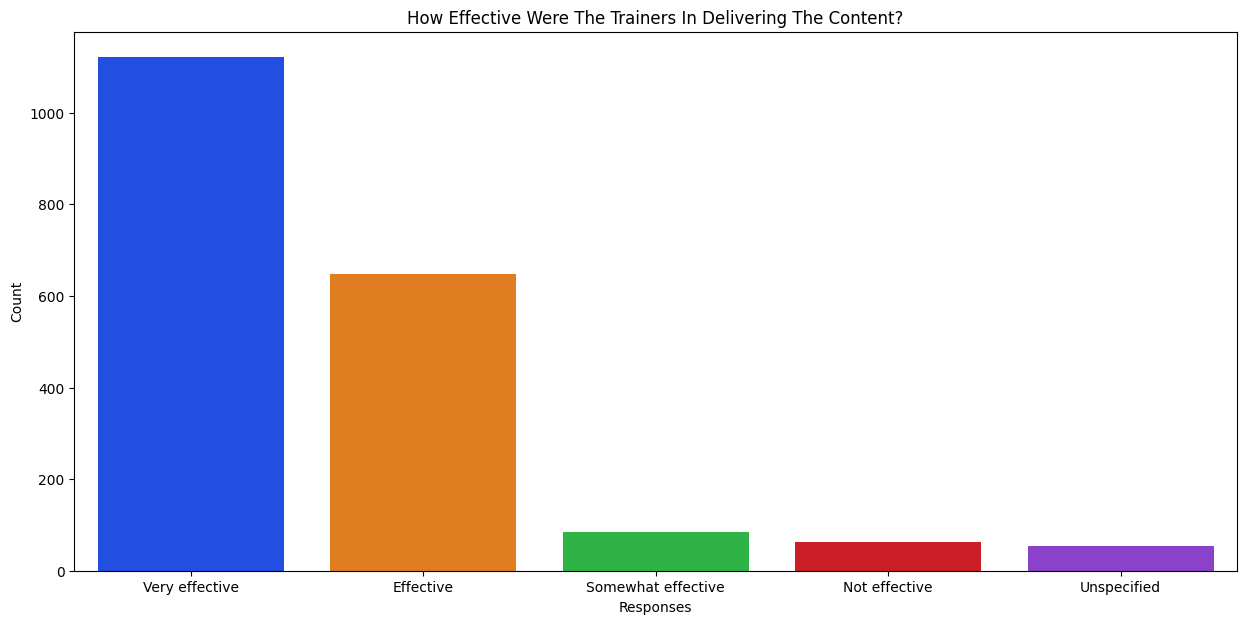

In [141]:
palette = sns.color_palette("bright", n_colors=len(effective_delivering_the_content))
plt.figure(figsize=(15, 7))
sns.barplot(x=effective_delivering_the_content.index, y=effective_delivering_the_content.values,hue=effective_delivering_the_content.index, palette=palette, legend=False)
plt.title("How Effective Were The Trainers In Delivering The Content?")
plt.xlabel("Responses")
plt.ylabel("Count")

# Save the plot
plt.savefig("effective_delivering_the_content.png")

# Show the plot
plt.show()

In [109]:
training_materials_provided = df["how_would_you_rate_the_training_materials_provided?"].value_counts()
training_materials_provided

how_would_you_rate_the_training_materials_provided?
Excellent      1084
Very good       662
Good            165
Unspecified      52
Poor              5
Name: count, dtype: int64

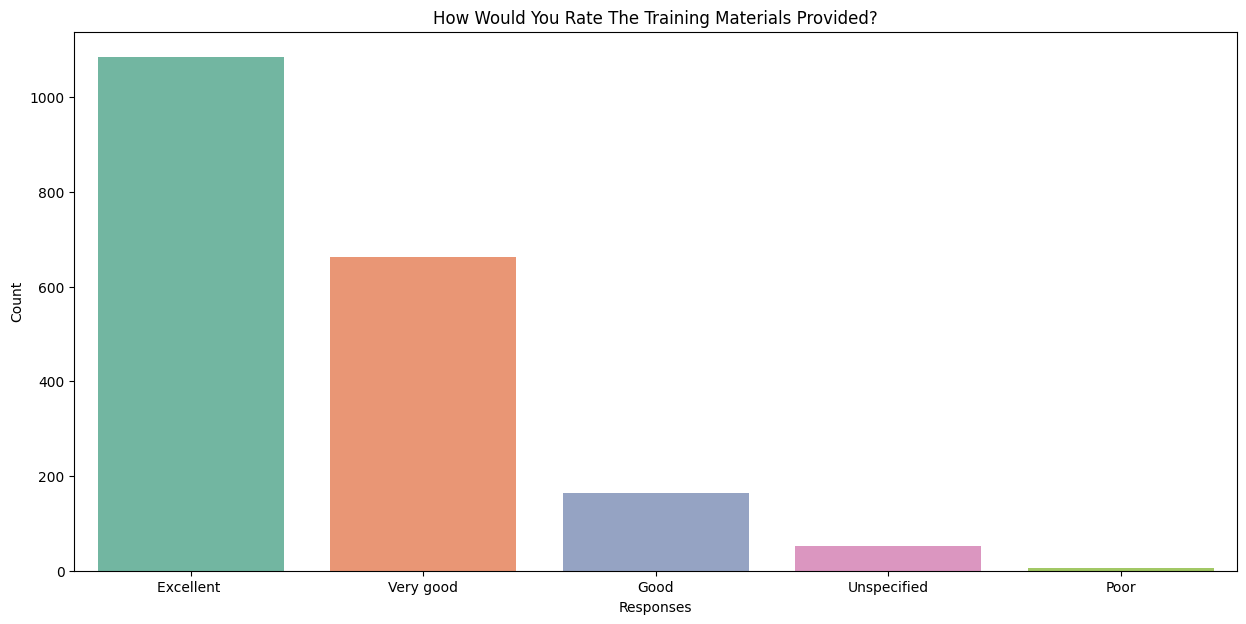

In [140]:
palette = sns.color_palette("Set2", n_colors=len(effective_delivering_the_content))
plt.figure(figsize=(15, 7))
sns.barplot(x=training_materials_provided.index, y=training_materials_provided.values,hue=training_materials_provided.index, palette=palette, legend=False)
plt.title("How Would You Rate The Training Materials Provided?")
plt.xlabel("Responses")
plt.ylabel("Count")

# Save the plot
plt.savefig("training_materials_provided.png")

# Show the plot
plt.show()

In [115]:
new_skills_or_knowledge = df["what_new_skills_or_knowledge_did_you_acquire_from_the_training?"].value_counts()
new_skills_or_knowledge

what_new_skills_or_knowledge_did_you_acquire_from_the_training?
Unspecified                                                304
How to turn on a tablet and connect to the Internet         74
STEM                                                        51
How to use the tablet                                       37
Cybersecurity                                               21
                                                          ... 
To be vigilant                                               1
The definition of cyber security and cime                    1
Using the Internet to get information                        1
Protecting personal information on social media              1
How to use a password to protect myself on the internet      1
Name: count, Length: 1038, dtype: int64

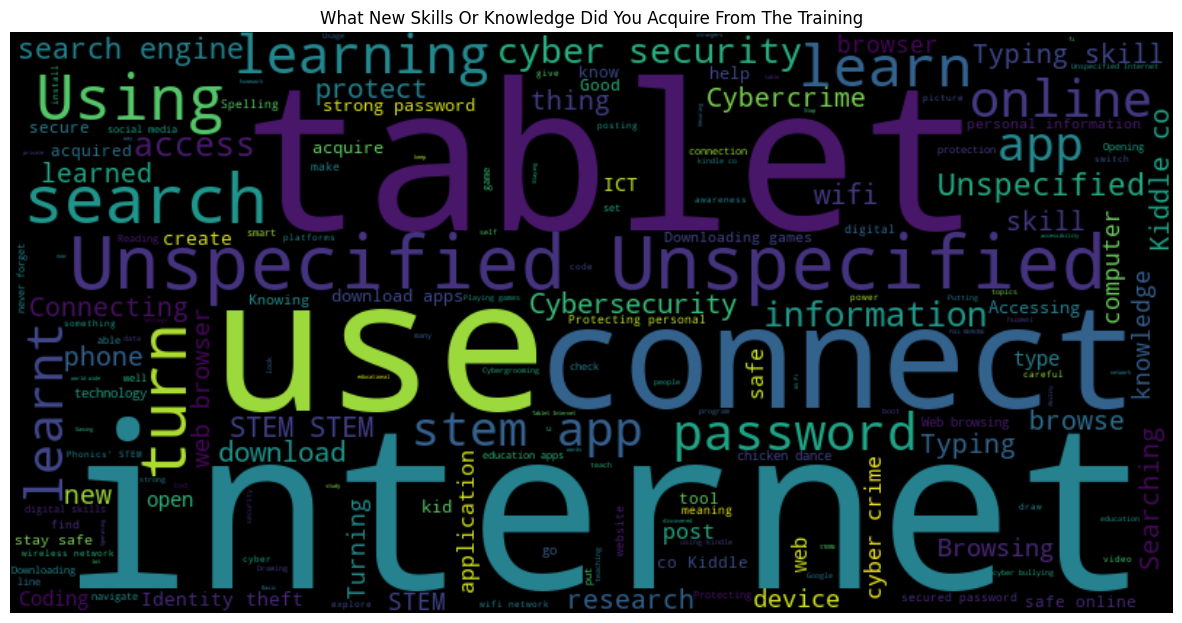

In [137]:
new_skills_or_knowledge = df["what_new_skills_or_knowledge_did_you_acquire_from_the_training?"]

# Join all responses into a single string
text = " ".join(new_skills_or_knowledge.dropna())

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, random_state=40).generate(text)

# Plot the word cloud
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("What New Skills Or Knowledge Did You Acquire From The Training")
plt.axis("off")
plt.savefig("new_skills_or_knowledge.png")
plt.show()

In [119]:
confident_using_technology_after_training = df["how_confident_do_you_feel_in_using_technology_for_learning_after_the_training?"].value_counts()
confident_using_technology_after_training

how_confident_do_you_feel_in_using_technology_for_learning_after_the_training?
Very confident        1027
Confident              775
Somewhat confident      94
Unspecified             63
Not confident            9
Name: count, dtype: int64

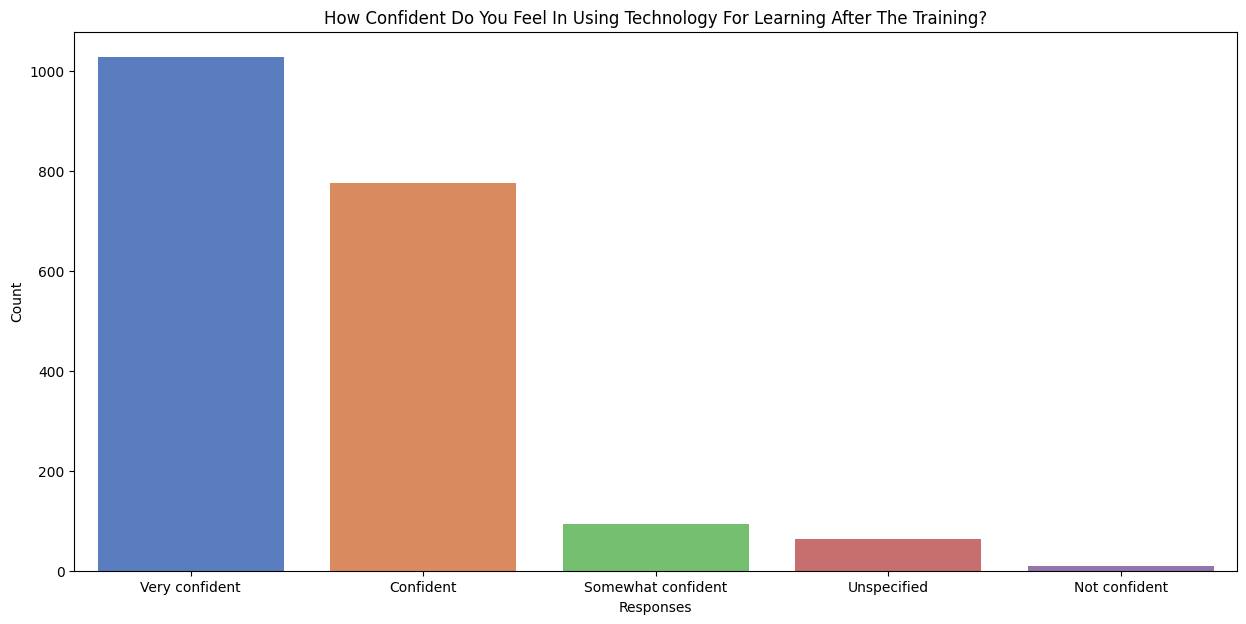

In [139]:
palette = sns.color_palette("muted", n_colors=len(confident_using_technology_after_training))
plt.figure(figsize=(15, 7))
sns.barplot(x=confident_using_technology_after_training.index, y=confident_using_technology_after_training.values,hue=confident_using_technology_after_training.index, palette=palette, legend=False)
plt.title("How Confident Do You Feel In Using Technology For Learning After The Training?")
plt.xlabel("Responses")
plt.ylabel("Count")

# Save the plot
plt.savefig("confident_using_technology_after_training.png")

# Show the plot
plt.show()

In [125]:
challenges_encounter = df["what_challenges_did_you_encounter_while_using_technology_during_the_training?"].value_counts()
challenges_encounter

what_challenges_did_you_encounter_while_using_technology_during_the_training?
Unspecified                                            595
No challenge                                           105
No challenges                                           83
Internet connectivity and limited number of tablets     72
No                                                      70
                                                      ... 
non                                                      1
Cyberbulling                                             1
Bad                                                      1
Devices not enough                                       1
Inadequate device                                        1
Name: count, Length: 508, dtype: int64

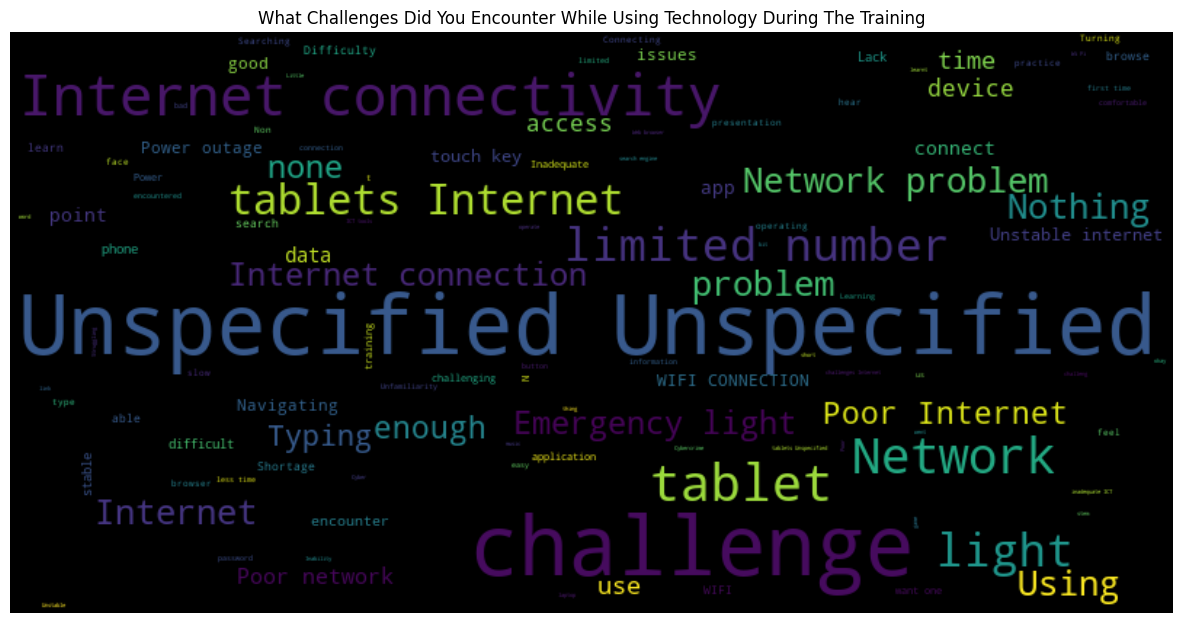

In [127]:
challenges_encounter = df["what_challenges_did_you_encounter_while_using_technology_during_the_training?"]

# Join all responses into a single string
text = " ".join(challenges_encounter.dropna())

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, random_state=40).generate(text)

# Plot the word cloud
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("What Challenges Did You Encounter While Using Technology During The Training")
plt.axis("off")
plt.savefig("challenges_encounter.png")
plt.show()

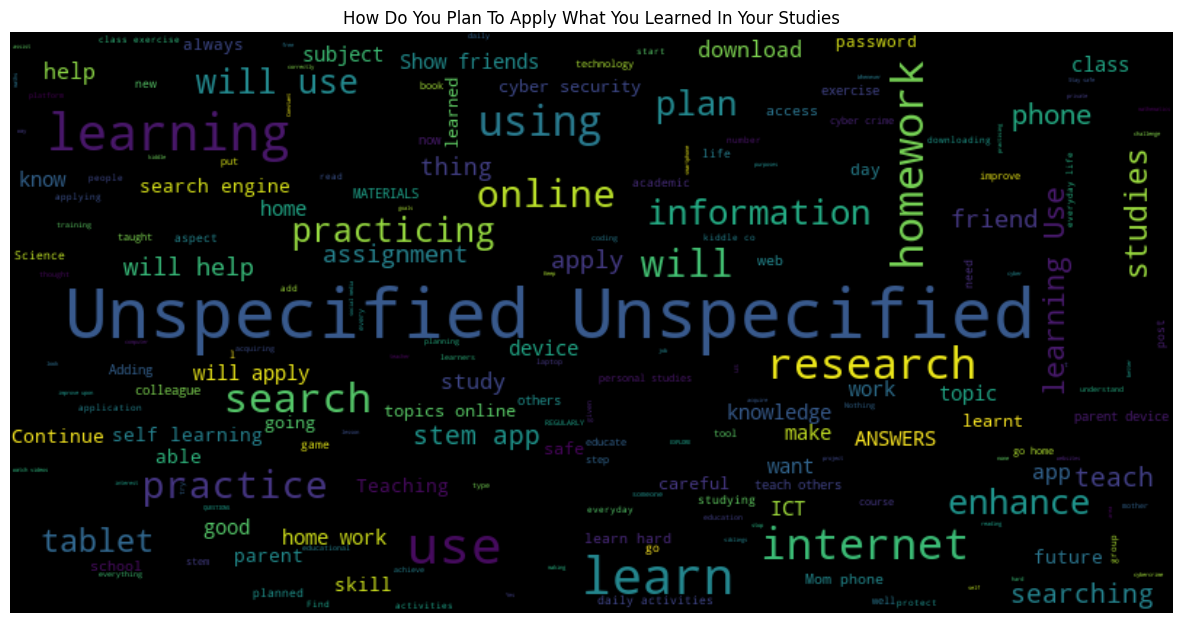

In [130]:

learned_in_studies = df["how_do_you_plan_to_apply_what_you_learned_in_your_studies?"]

# Join all responses into a single string
text = " ".join(learned_in_studies.dropna())

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, random_state=40).generate(text)

# Plot the word cloud
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("How Do You Plan To Apply What You Learned In Your Studies")
plt.axis("off")
plt.savefig("learned_in_studies.png")
plt.show()

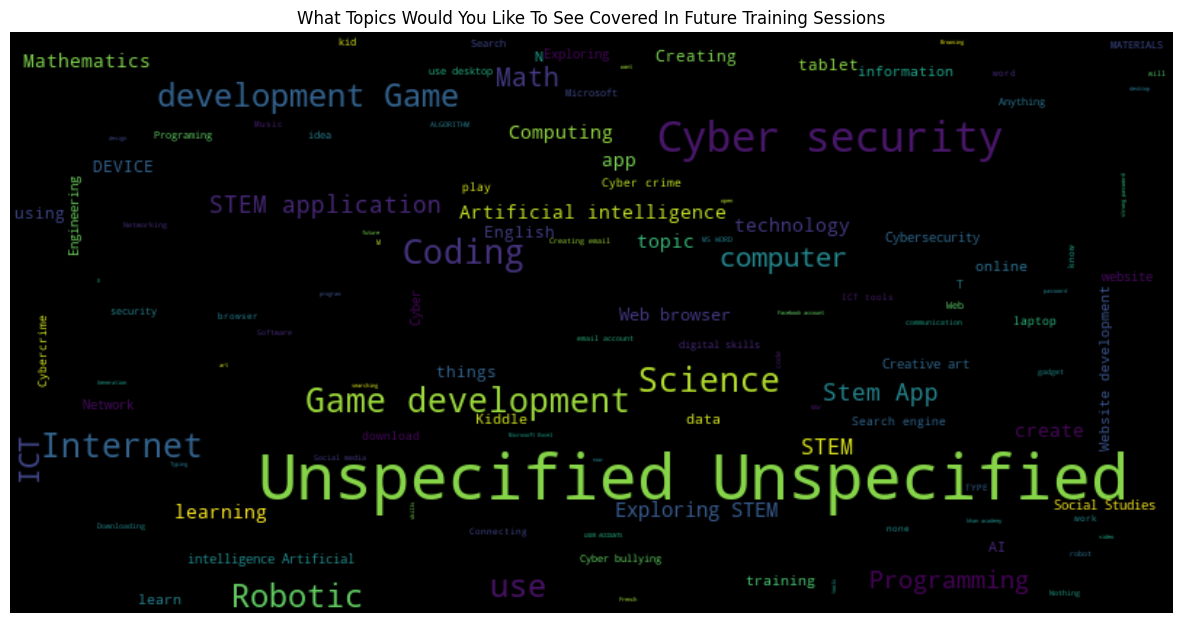

In [133]:
topics_in_future_training_sessions = df["what_topics_would_you_like_to_see_covered_in_future_training_sessions?"]

# Join all responses into a single string
text = " ".join(topics_in_future_training_sessions.dropna())

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, random_state=40).generate(text)

# Plot the word cloud
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("What Topics Would You Like To See Covered In Future Training Sessions")
plt.axis("off")
plt.savefig("topics_in_future_training_sessions.png")
plt.show()

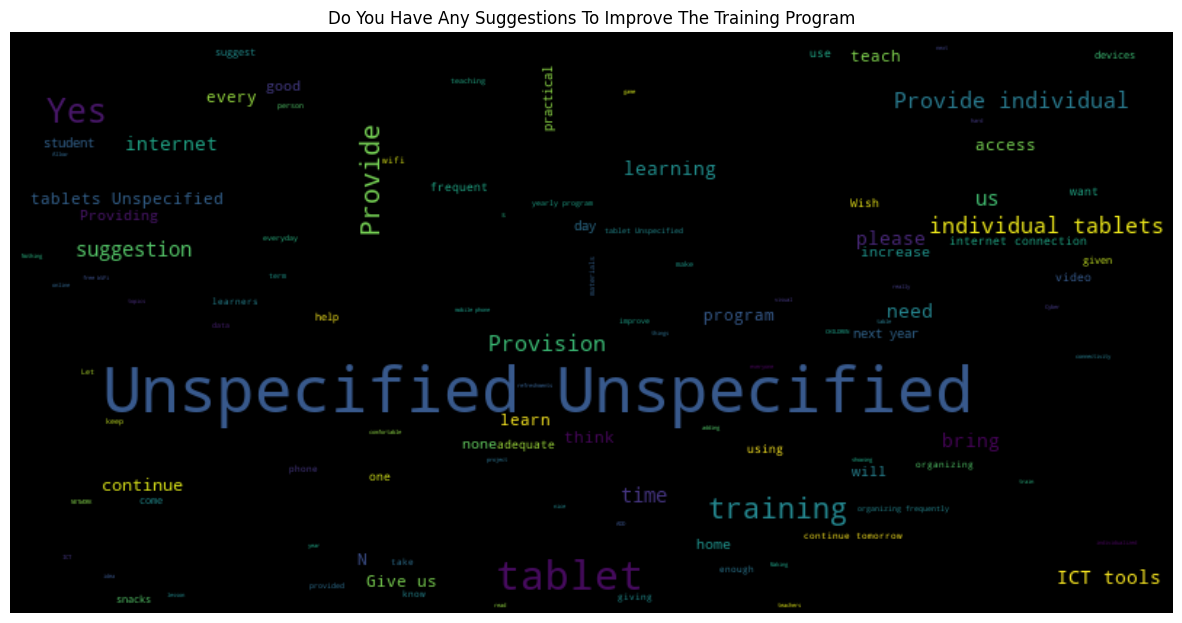

In [138]:
suggestions_to_improve = df["do_you_have_any_suggestions_to_improve_the_training_program?"]

# Join all responses into a single string
text = " ".join(suggestions_to_improve.dropna())

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, random_state=40).generate(text)

# Plot the word cloud
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Do You Have Any Suggestions To Improve The Training Program")
plt.axis("off")
plt.savefig("suggestions_to_improve.png")
plt.show()